In [53]:
### Run this cell before continuing. 
library(tidyverse)
library(repr)
library(purrr)
options(repr.matrix.max.rows = 6)

In [54]:
# HEAD OF ORIGINAL TABLES
players <- read_csv("data_gp/players.csv")
sessions <- read_csv("data_gp/sessions.csv")
head(players)
head(sessions)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


# Data Description
## players.csv
### Variables
#### Categorical
1. **experience** - chr - Split into classes: Beginner, Regular, Amateur, Pro, and Veteran.

2. **subscribe** - lgl - A boolean value (TRUE/FALSE) for whether the player is subscribed to a game-related newsletter.

3. **hashedEmail** - chr - A hashed version of the players email.

4. **name** - chr - The name of the player.

5. **gender** - chr - Uses the following genders: Male, Female, Non-Binary, Two-Spirited, Agender, Prefer not to say, and Other.

#### Quantitative
6. **played_hours** - dbl - The number of hours the player spent playing. Ranges from 0.0 to 223.1 hours.

7. **Age** - dbl - The age of the player. Ranges from 8 to 50 years old.

****

## sessions.csv
### Variables
#### Categorical

1. **hashedEmail** - chr

2. **start_time** and **end_time** - chr - The start and end time of a gaming session.

#### Quantitative
4. **original_start_time** and **original_end_time** - dbl - The start and end time of a gaming session in UNIX time.

****

## Issues in the Data
- Some age values have NA's in them.
- start_time and end_time use characters and are therefore categorical variables. However, they should be converted into a quantitative format by using a date-time variable type.
- original_start_time and original_end_time are not very useful as they don't provide enough decimal places.

# Questions
**Broad Question**: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

**Specific Question**: What is the relationship between total played hours and subscription class of a player? How does a player’s experience strengthen or weaken the ability to predict the subscription class of a player?

We can see the relationship between subscription status and various other quantitative variables and then calculate accuracy of predictions.

# Exploratory Data Analysis and Visualization
However, to help tidy up start_time and end_time into quantifiable variables, we will convert them into date-time vectors.

In [55]:
# TABLE 1
# Shows all mean values for quantitative variables in players.csv
avg_df <- players |>
  select(played_hours, Age) |>
  summarize(played_hours_avg = mean(played_hours, na.rm = TRUE),
            age_avg = mean(Age, na.rm = TRUE))

avg_df

played_hours_avg,age_avg
<dbl>,<dbl>
5.845918,20.52062


experience,avg_hours
<chr>,<dbl>
Amateur,6.0174603
Beginner,1.2485714
Pro,2.6000000
Regular,18.2083333
Veteran,0.6479167


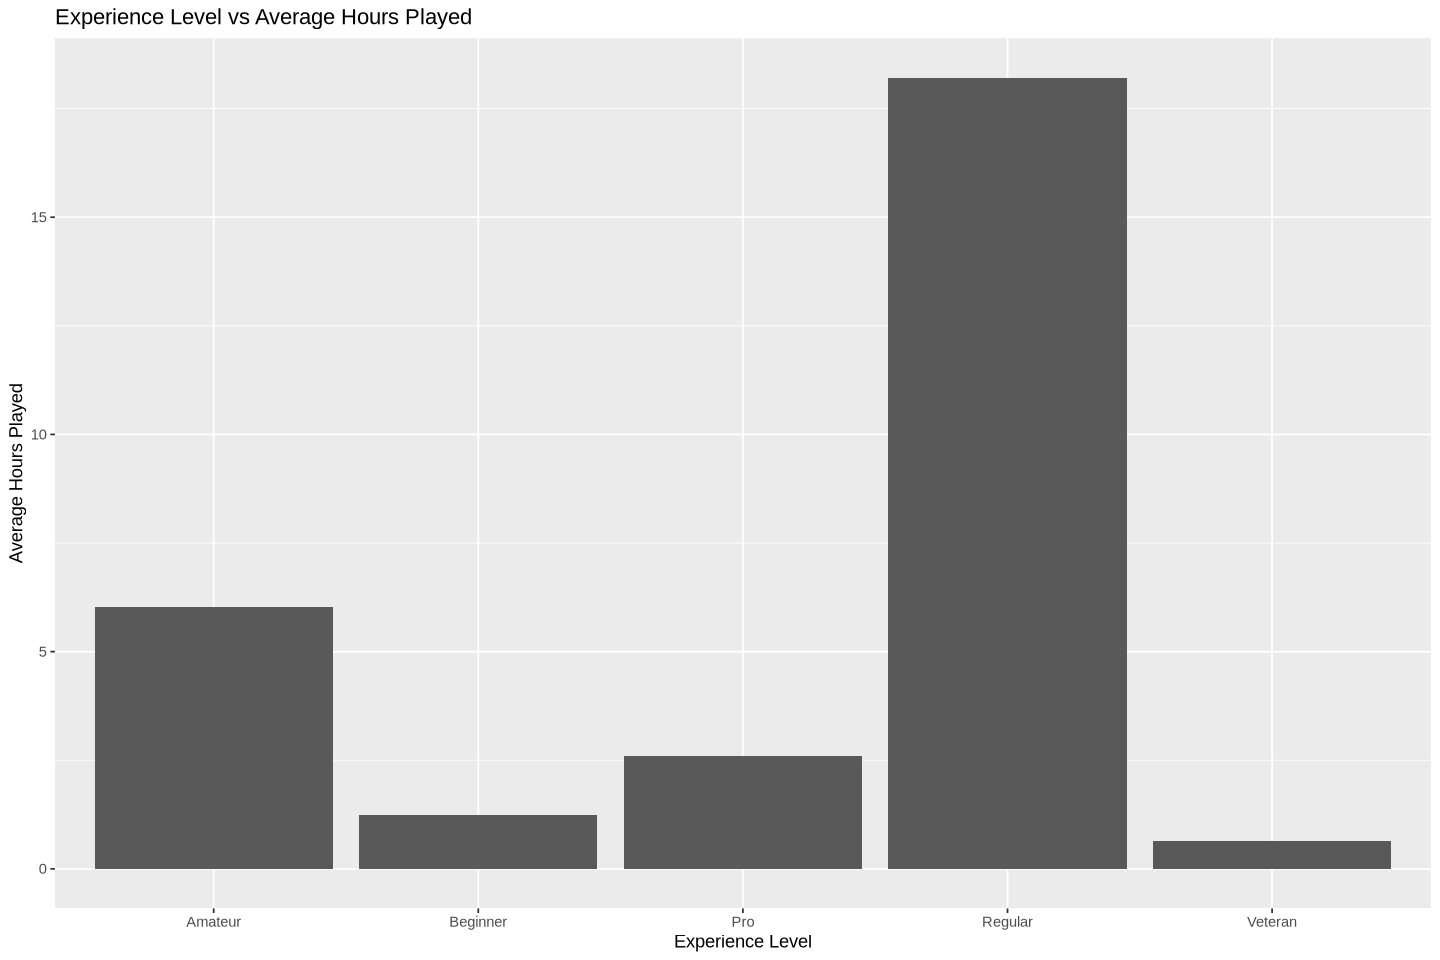

In [56]:
# TABLE 2
players_avg_hours <- players |>
                    group_by(experience) |>
                    summarize(avg_hours = mean(played_hours))
players_avg_hours
players_avg_hours_plot <- players_avg_hours|>
                    ggplot(aes(x = experience, y = avg_hours)) + geom_bar(stat = 'identity') + labs(title = "Experience Level vs Average Hours Played", x = "Experience Level", y = "Average Hours Played")
players_avg_hours_plot

Average hours played is not related to experience level as the highest hours lie in regular experience while veteran experience has the lowest hours.

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


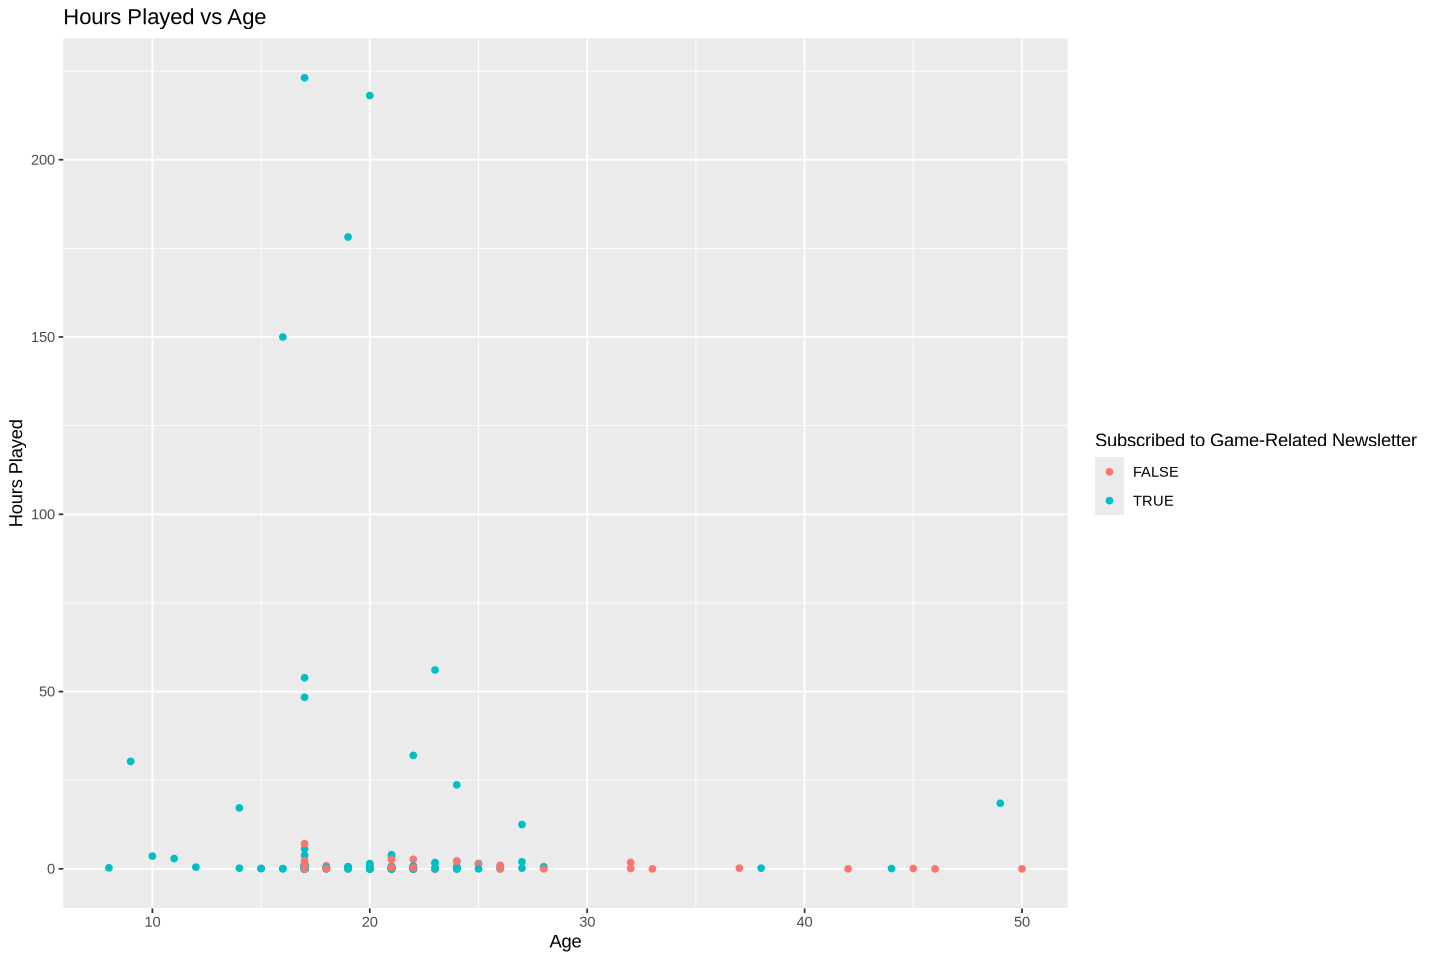

In [57]:
# TABLE 3
options(repr.plot.width = 12, repr.plot.height = 8)
hours_vs_age <- players |>
                ggplot(aes(x = Age, y = played_hours, color = subscribe)) +
                geom_point() +
                labs(x = "Age", y = "Hours Played", title = "Hours Played vs Age", color = "Subscribed to Game-Related Newsletter")
hours_vs_age

The players with most hours played fall between the age range of 15-25 years and are subscribed.

# Methods and Plan
We can already compare subscriptions with total hours played using a bar graph where bars are subscriptions and the y-axis is the average total hours played per player.

We should try to set up a classification prediction model aiming to predict subscription status. We can use a large range of $k$ values for our $k$-nn model and calculate which one has the greatest accuracy to use. 

\
**Why is this method appropriate?**

$k$-nn classification is appropriate because it does not assume any type of relationship between variables. This reflects our data as shown in TABLE 2.

\
**Assumptions**

We must assume that dataset provided is large enough to accurately represent both classes of subscription.

\
**Limitations**

$k$-nn models can be expensive with larger datasets are far less effective if there aren't a balanced number of points in each class being classified.

\
**Selecting the model**

Use all variables as predictors and calculate accuracy, then do it again without experience as a predictor. Lastly, determine whether accuracy improved or worsened with experience as a predictor.

\
**How are you going to process the data to apply the model?**

Handle any missing data and convert categorical variables into proper types like factors. Additionally, the data will be split into an 80% training set and a 20% testing set. We will use cross validation to improve overall reliability.